In [2]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense



Using TensorFlow backend.


In [3]:
df = pd.read_csv('pima-indians-diabetes.csv',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#separate predictor and target variables 
X= df.drop(8, axis=1)
y = df[8]

In [6]:
from sklearn.preprocessing import scale
X = scale(X)

C:\Users\student_yash\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [34]:
# def normalize(data, type_=1): 
#     """Normalize data."""
#     if type_==0:
#         # Convert pixel values from [0:255] to [0:1] by global factor
#         data = data.astype(np.float32) / data.max()
#     if type_==1:
#         # Convert pixel values from [0:255] to [0:1] by local factor
#         div = data.max(axis=tuple(np.arange(1,len(data.shape))), keepdims=True) 
#         div[div < 0.01*data.mean()] = 1. # protect against too small pixel intensities
#         data = data.astype(np.float32)/div
#     if type_==2:
#         # Standardisation of each image 
#         data = data.astype(np.float32) / data.max() 
#         mean = data.mean(axis=tuple(np.arange(1,len(data.shape))), keepdims=True) 
#         std = data.std(axis=tuple(np.arange(1,len(data.shape))), keepdims=True) 
#         data = (data-mean)/std

#     return data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=38)

In [9]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)

In [10]:
y_train


array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [11]:
#build model
model = Sequential()

model.add(Dense(12,input_dim = 8,activation = 'relu'))

model.add(Dense(8,activation="relu"))

model.add(Dense(2,activation='sigmoid'))

model.compile(loss= 'binary_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

model.fit(X_train,y_train,epochs= 150,batch_size=10)

Epoch 1/150
514/514 [==============================] - 0s 696us/step - loss: 0.6817 - acc: 0.6527
Epoch 2/150
514/514 [==============================] - 0s 134us/step - loss: 0.6313 - acc: 0.6780
Epoch 3/150
514/514 [==============================] - 0s 134us/step - loss: 0.5970 - acc: 0.6634
Epoch 4/150
514/514 [==============================] - 0s 140us/step - loss: 0.5686 - acc: 0.6673
Epoch 5/150
514/514 [==============================] - 0s 151us/step - loss: 0.5462 - acc: 0.6683
Epoch 6/150
514/514 [==============================] - 0s 130us/step - loss: 0.5274 - acc: 0.6809
Epoch 7/150
514/514 [==============================] - 0s 147us/step - loss: 0.5130 - acc: 0.7062
Epoch 8/150
514/514 [==============================] - 0s 138us/step - loss: 0.4997 - acc: 0.7296
Epoch 9/150
514/514 [==============================] - 0s 147us/step - loss: 0.4888 - acc: 0.7500
Epoch 10/150
514/514 [==============================] - 0s 136us/step - loss: 0.4792 - acc: 0.7665
Epoch 11/150
514/51

514/514 [==============================] - 0s 132us/step - loss: 0.3468 - acc: 0.8366
Epoch 84/150
514/514 [==============================] - 0s 128us/step - loss: 0.3469 - acc: 0.8405
Epoch 85/150
514/514 [==============================] - 0s 122us/step - loss: 0.3448 - acc: 0.8366
Epoch 86/150
514/514 [==============================] - 0s 124us/step - loss: 0.3439 - acc: 0.8424
Epoch 87/150
514/514 [==============================] - 0s 126us/step - loss: 0.3448 - acc: 0.8414
Epoch 88/150
514/514 [==============================] - 0s 124us/step - loss: 0.3431 - acc: 0.8385
Epoch 89/150
514/514 [==============================] - 0s 124us/step - loss: 0.3428 - acc: 0.8414
Epoch 90/150
514/514 [==============================] - 0s 128us/step - loss: 0.3424 - acc: 0.8424
Epoch 91/150
514/514 [==============================] - 0s 124us/step - loss: 0.3415 - acc: 0.8405
Epoch 92/150
514/514 [==============================] - 0s 126us/step - loss: 0.3407 - acc: 0.8473
Epoch 93/150
514/514 [=

In [12]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

In [13]:
y_pred = np.argmax(y_pred,axis=1)
accuracy_score(y_test,y_pred)

0.6968503937007874

Text(0, 0.5, 'loss')

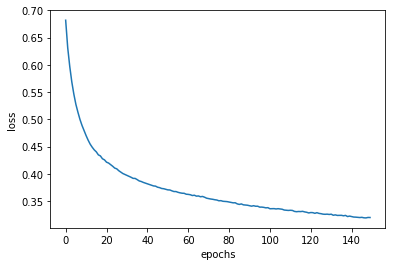

In [14]:
import matplotlib.pyplot as plt
plt.plot(model.history.epoch,model.history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

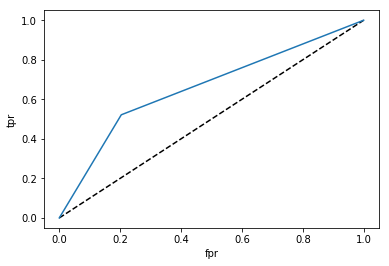

In [15]:
#roc curve for model

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [16]:


#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)



0.6590177133655395

In [17]:
#compare ml algorithms


In [18]:
#necessary importes for different algorithms
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
#list of machine learning algorithms
MLA = [
    #ensemble method
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    
    #gaussian processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #naive_bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #nearest neighbours
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #trees
    tree.DecisionTreeClassifier(),
    
]

In [20]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
row_index = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=38)

In [21]:
# training of ML algorithm
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)





    row_index+=1



In [22]:
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
8,RidgeClassifierCV,0.7821,0.7677,0.732394,0.565217,0.723967
15,LinearSVC,0.7802,0.7677,0.732394,0.565217,0.723967
6,LogisticRegressionCV,0.7879,0.7677,0.732394,0.565217,0.723967
12,GaussianNB,0.7743,0.7559,0.692308,0.586957,0.719404
10,Perceptron,0.7646,0.7480,0.666667,0.608696,0.717928
3,GradientBoostingClassifier,0.9475,0.7362,0.647059,0.597826,0.706320
4,RandomForestClassifier,0.9825,0.7323,0.666667,0.521739,0.686795
13,SVC,0.8521,0.7323,0.653846,0.554348,0.693841
5,GaussianProcessClassifier,0.9066,0.7283,0.653333,0.532609,0.686057
14,NuSVC,0.8502,0.7283,0.645570,0.554348,0.690754


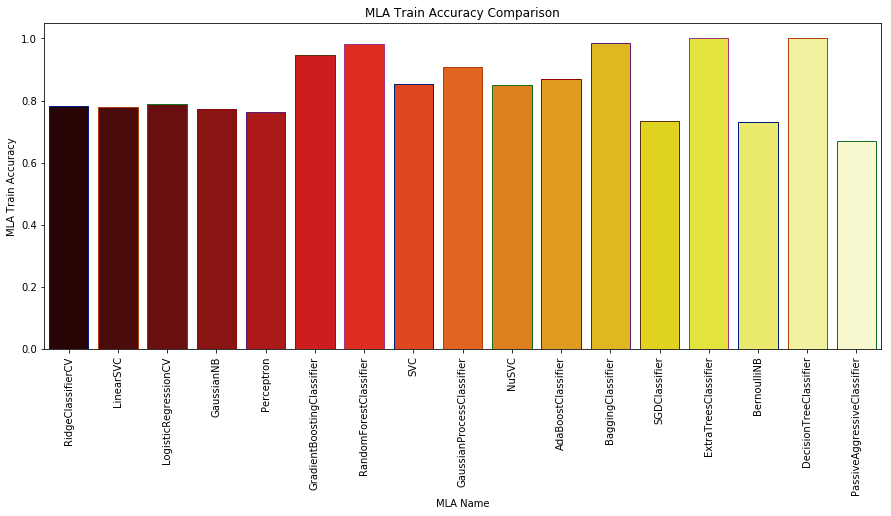

In [23]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

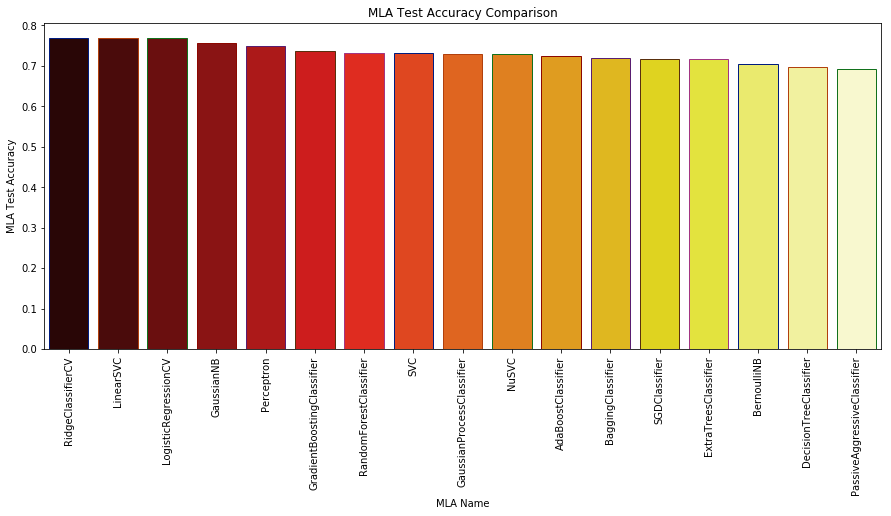

In [24]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

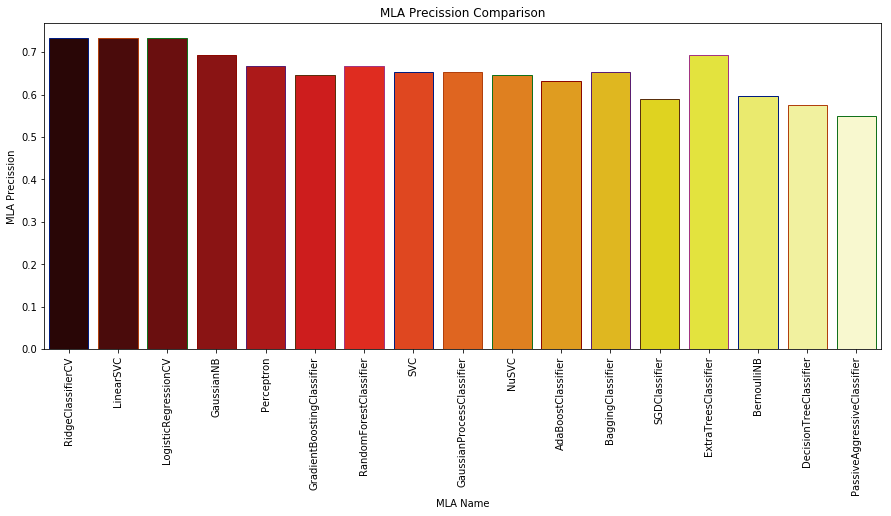

In [25]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
plt.show()

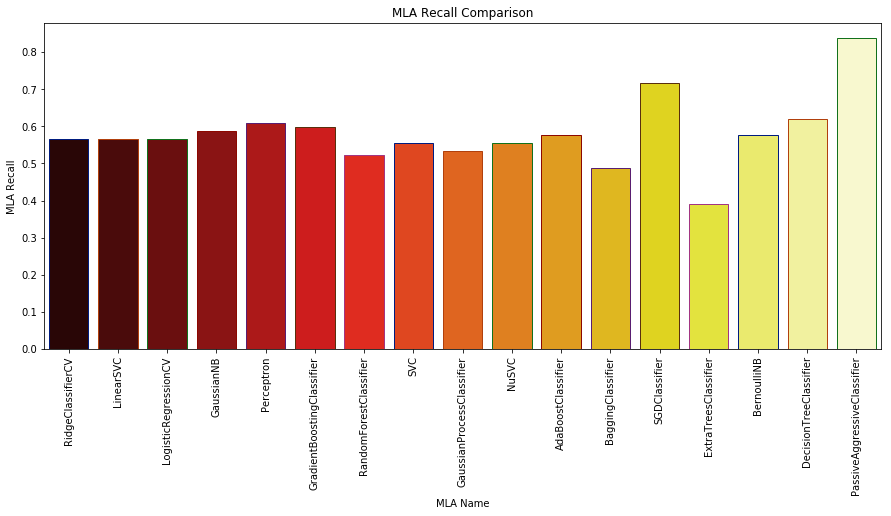

In [26]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

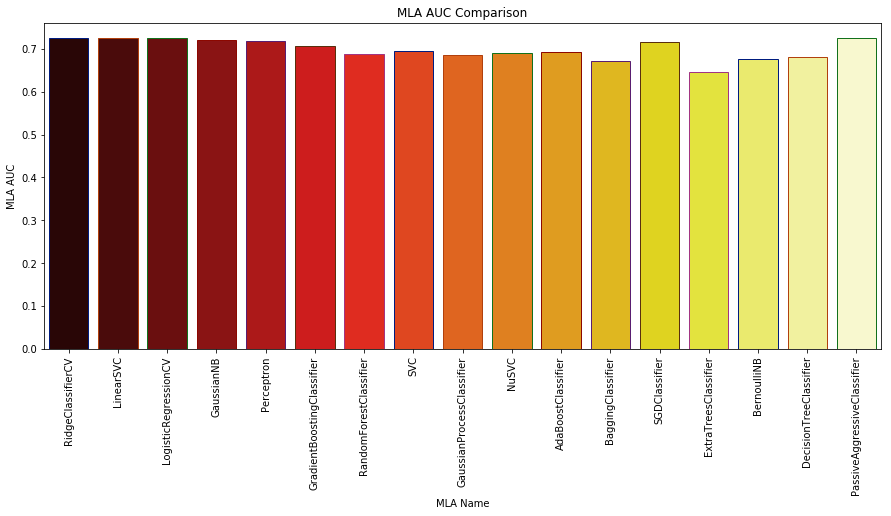

In [27]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA AUC Comparison')
plt.show()

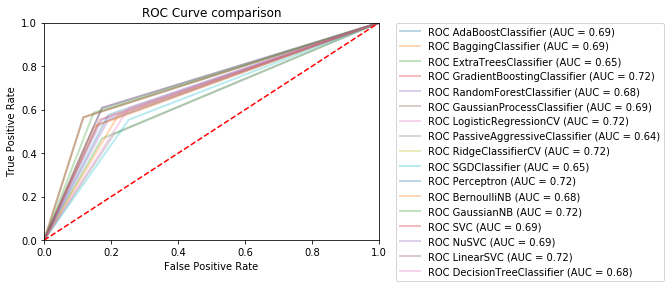

In [28]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

In [29]:
#Tuning of a choosen algorithm. here we choose RidgeClassifier

In [37]:
tunealg = linear_model.RidgeClassifierCV()
tunealg.fit(X_train,y_train)
print('BEFORE tuning Parameters: ', tunealg.get_params())
print("BEFORE tuning Training w/bin set score: {:.2f}". format(tunealg.score(X_train, y_train))) 
print("BEFORE tuning Test w/bin set score: {:.2f}". format(tunealg.score(X_test, y_test)))
print('..'*10)

BEFORE tuning Parameters:  {'alphas': array([ 0.1,  1. , 10. ]), 'class_weight': None, 'cv': None, 'fit_intercept': True, 'normalize': False, 'scoring': None, 'store_cv_values': False}
BEFORE tuning Training w/bin set score: 0.78
BEFORE tuning Test w/bin set score: 0.77
....................


In [69]:
 from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
param_grid = {#'bootstrap': [True, False],
              'class_weight': ['balanced' , None],
#               'max_depth': [1, 2,3,4, None],
#               'max_features': ['log2', 'auto'],
#               'max_leaf_nodes': [0,1,2,3,4, None],
#               'min_impurity_decrease': [True, False, None],
#               'min_impurity_split': [True, False],
#               'min_samples_leaf': [1, 2,3,4,5],
#               'min_samples_split': [1,2,3,4,5],
#               'min_weight_fraction_leaf': [0.0,1.0,2.0,3.0,4.0,5.0], 
#               'n_estimators': [10,15,25,35,45], 
#               'n_jobs':  [1,2,3,4,5], 
#               'oob_score': [True, False], 
#               'random_state': [0,1, 2,3,4, None], 
#               'verbose': [0,1, 2,3,4, 5], 
#               'warm_start': [True, False],
#                 'alphas':[0.1,0.2,0.5,1.0,2,3,5,8,10],
                 'cv':[cv],
             }
print(cv)

ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None)


In [70]:
tune_model = model_selection.GridSearchCV(tunealg, param_grid=param_grid, scoring = 'roc_auc')
tune_model.fit (X_train, y_train)

print('AFTER tuning Parameters: ', tune_model.best_params_)
print("AFTER tuning Training w/bin set score: {:.2f}". format(tune_model.score(X_train, y_train))) 
print("AFTER tuning Test w/bin set score: {:.2f}". format(tune_model.score(X_test, y_test)))
print('-'*10)

AFTER tuning Parameters:  {'class_weight': None, 'cv': ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None)}
AFTER tuning Training w/bin set score: 0.85
AFTER tuning Test w/bin set score: 0.81
----------


In [56]:
#Here we can see the improvemnts in results